In [2]:
#imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

from sklearn import preprocessing

##### Let us see if there are some cleaning activity that we can perform(except outlier removal) before some visualization. This is important because we end up unnecessary observation because of raw data.

In [3]:
def dummy():
    df = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TrainData_PA.csv')
    print('Initial df size', df.shape)
    
    print('Duplicates size', df[df.duplicated()].shape)
    
    print('NaN columns :', df.columns[df.isna().any()].tolist())
    
    df = df.fillna('NA')
    print('NaN columns (post fillna):', df.columns[df.isna().any()].tolist())
    print('Duplicates size (post fillna)', df[df.duplicated()].shape)
    
    key_columns = [x for x in list(df) if x != 'time']
    print("Duplicates without considering *time* feature : ", df[df.duplicated(key_columns)].shape)
    
dummy()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)


In [4]:
def getTheCleansedData():
    df = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TrainData_PA.csv')
    df = df.fillna('NA').reset_index(drop=True)
    
    key_columns = [x for x in list(df) if x != 'time']
    df = df.sort_values(by='time', ascending=False).reset_index(drop=True)
    
    df = df.drop_duplicates(key_columns,keep='first').reset_index(drop=True)
   
    colorMap = {'Condo': 'red', 'SFR': 'green', 'Duplex': 'black', 'NA': 'blue', 'Quadplex': 'yellow', 'Triplex':'orange', }
    df['property_type_color_map'] = df.property_type.apply(lambda x : colorMap[x])
    
    return df.reset_index(drop=True)
df = getTheCleansedData()
print(df.shape,df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18080 entries, 0 to 18079
Data columns (total 41 columns):
county                     18080 non-null object
city                       18080 non-null object
zipcode                    18080 non-null object
address                    18080 non-null object
state                      18080 non-null object
rent                       18080 non-null int64
latitude                   18080 non-null float64
longitude                  18080 non-null float64
cemetery_dist_miles        18080 non-null float64
nationalhighway_miles      18080 non-null float64
railline_miles             18080 non-null float64
starbucks_miles            18080 non-null float64
walmart_miles              18080 non-null float64
hospital_miles             18080 non-null float64
physician_dist_miles       18080 non-null float64
dentist_dist_miles         18080 non-null float64
opt_dist_miles             18080 non-null float64
vet_dist_miles             18080 non-null float6

#### Going by the Udacity project review metrics:
#### 1. Univariate Analysis 

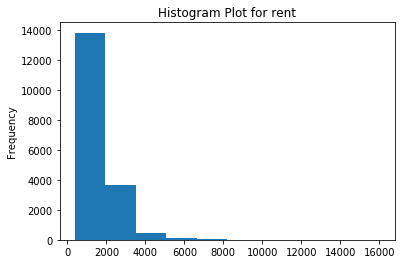

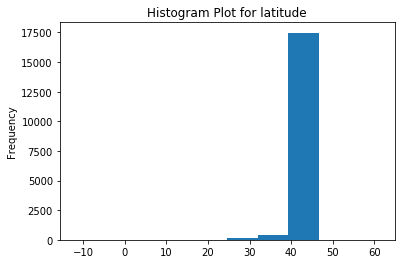

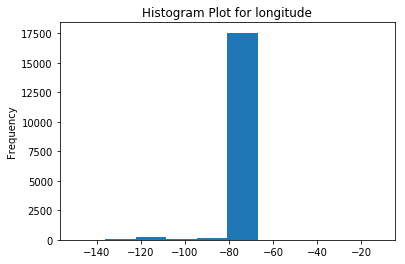

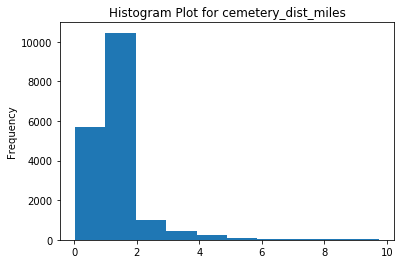

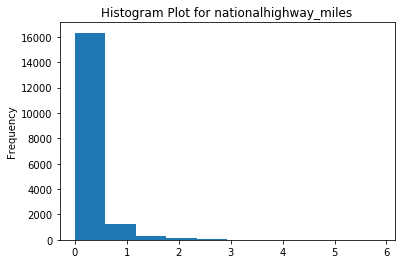

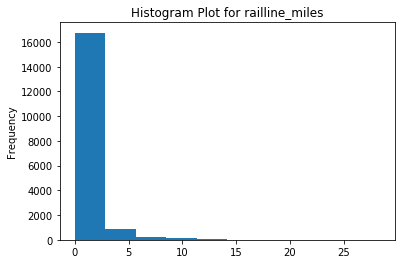

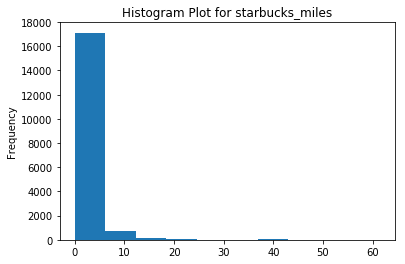

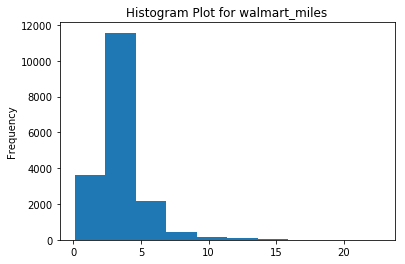

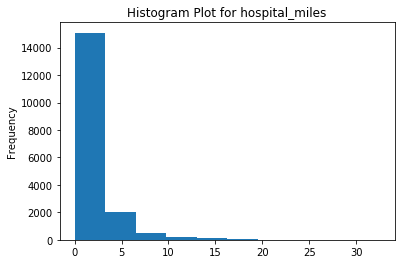

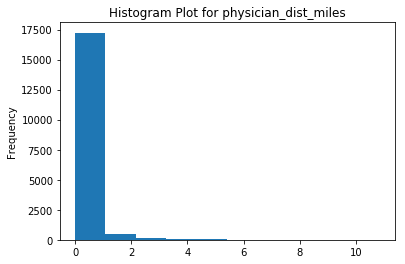

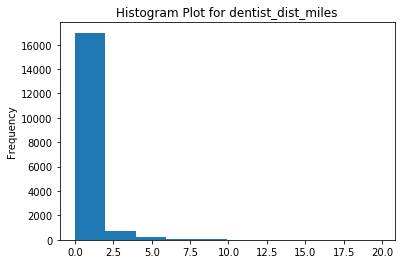

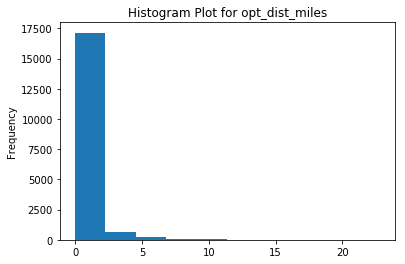

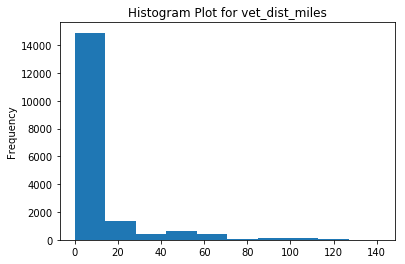

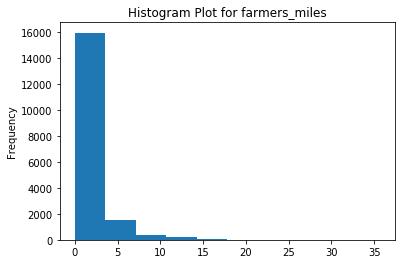

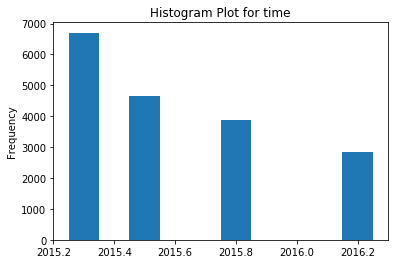

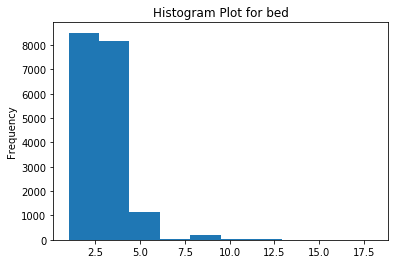

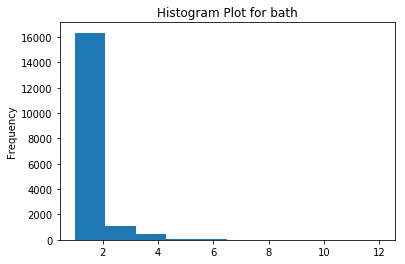

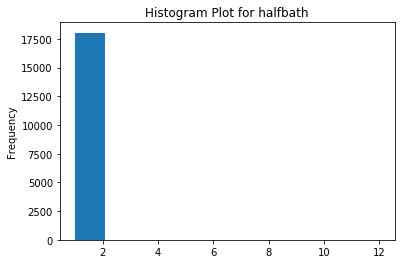

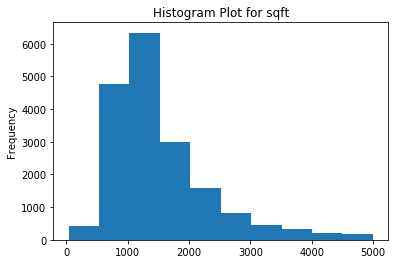

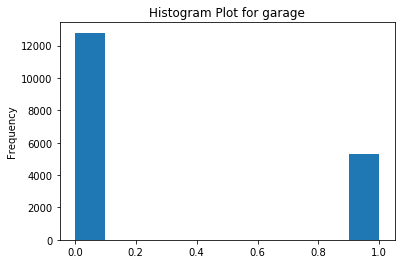

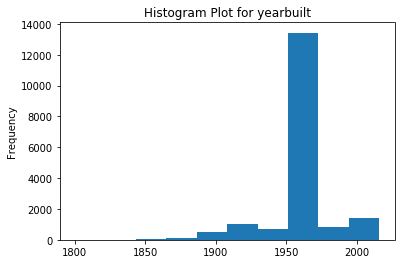

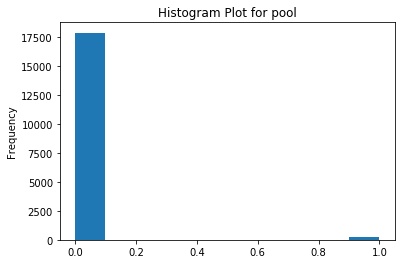

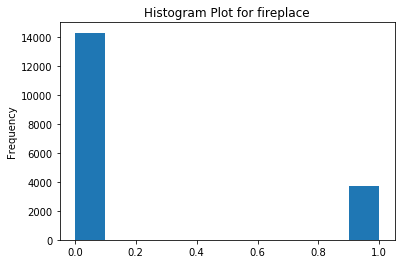

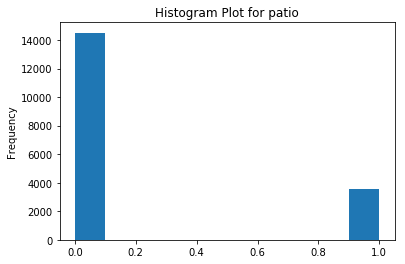

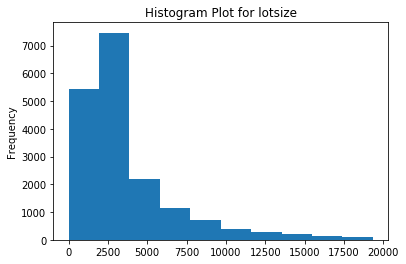

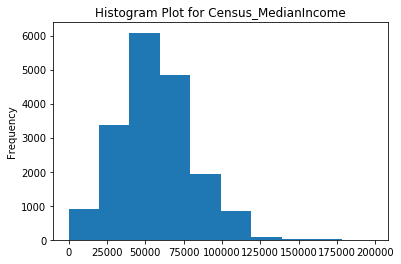

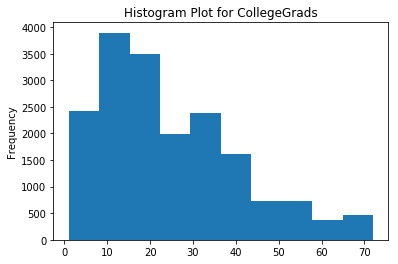

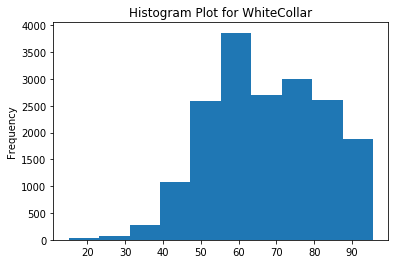

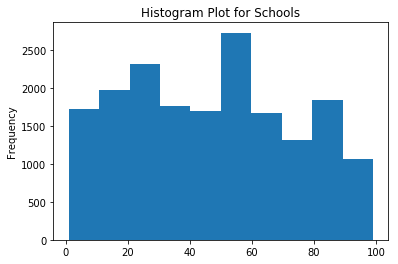

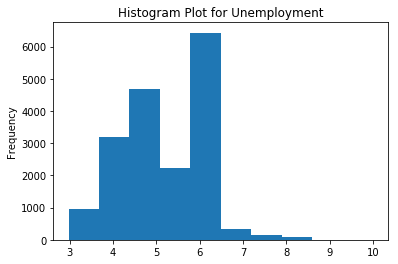

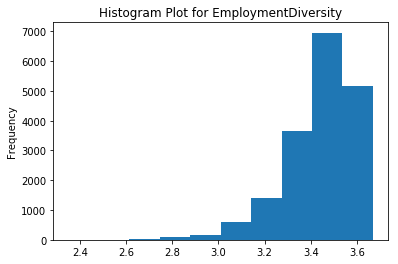

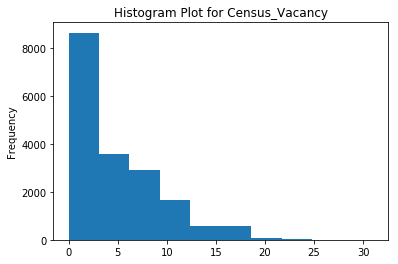

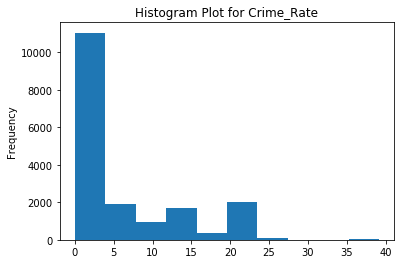

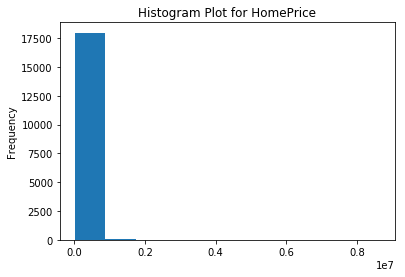

In [18]:
for c in list(df):
    if df[c].dtype in ['int64','float64']:
        
        df[c].plot(kind='hist',title='Histogram Plot for '+c)
        plt.show()

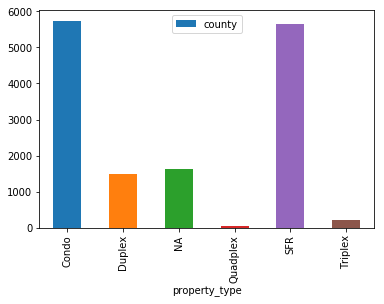

In [22]:
def plotPropertyTypeHist(df):
    temp = df.drop_duplicates(['longitude','latitude']).reset_index(drop=True)
    temp2 = temp.groupby('property_type').agg('count').reset_index()[['property_type','county']]
    temp2.plot.bar('property_type','county')
plotPropertyTypeHist(df)

##### Following require boxcox transformations: (skewness is huge)
* Rent
* distances : 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles'
* property compositional attributes : 'bed', 'bath', 'halfbath'
* yearbuilt
* lotsize
* Census_MedianIncome
* EmploymentDiversity
* Census_Vacancy
* Crime_Rate
* HomePrice

##### Folllowing requires min max scaling or we can opt boxcox: (less skewness in the data)
* sqrt
* CollegeGrads
* WhiteCollor
* Schools
* Unemployment

##### Analysis:
* 'time' Plot indicates we need to take 2016.2 as the latest but also need to take older recods which are not in 2016.2. Just like we did in the cleaning activity earlier. We sorted in descending order for time and then removed duplicates keeping the first occurrence; thus retaining the latest.
* 'property' plot indicates 
* - there are fewer samples for Quadplex, Triplex and Duplex
* - 'NA' might not be a valid property type. It might indicate simply a missing value. Therefore, we have a losss of 14% of the total samples due to missing values.
* - that we may plan to have seperate predicting regression models for 'Condo' and 'SFR' because we have high samples to regression model. Higher samples higher is the confidence of the prediction. We may plan for a ensembled approach.

In [20]:
print(list(df))

['county', 'city', 'zipcode', 'address', 'state', 'rent', 'latitude', 'longitude', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'time', 'bed', 'bath', 'halfbath', 'sqft', 'property_type', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'property_type_color_map']


##### We have highest rent in the year : 1960

In [ ]:
#let us plot the hot in mind
year = list(df[df.rent == df['rent'].max()]['yearbuilt'])[0]
#y_ticks = (df.rent.min() + df.rent.max())/4
y_ticks = list(np.arange(df.rent.min(), df.rent.max(), 3000))
y_ticks.append(df.rent.max())

fig, ax = plt.subplots()
ax.axhline(df['rent'].max(),color='r',lw=1)
ax.axvline(year,color='r',lw=1)
plt.xticks(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20),rotation=45)

plt.yticks(y_ticks)


plt.scatter(df['yearbuilt'],df['rent'])
plt.show()

##### * Till 1900 the data are not so reliable or stable.  i.e. it has to fluctuation when observed in the plot and hence there is no regular pattern there.
##### * And Also, 1960 highest rent seems like out of the blue. Someone really got lucky or it is an data entry error. It is a outlier for sure.

In [ ]:
df.info()

In [ ]:
def displayRentPerYear(df):
    temp = pd.DataFrame()
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('max').reset_index()
    temp[['yearbuilt','max_rent']] = temp1[['yearbuilt','rent']]
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('min').reset_index()
    temp['min_rent'] = temp1['rent']
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('mean').reset_index()
    temp['mean_rent'] = temp1['rent']
    #temp.plot.line('yearbuilt','rent')
    #temp.plot.line('yearbuilt','min_rent')
    temp.plot('yearbuilt',['min_rent','mean_rent'],xticks=(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20)))
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20)), yticks=y_ticks)
    fig, ax = plt.subplots()
    #ax.axhline(df['rent'].max(),color='r',lw=1)
    #ax.axvline(year,color='r',lw=1)
    ax.figure.text = 'Zoomed'
    ax.text(1960,int(temp.max_rent.max()),'Max Rent - '+str(temp.max_rent.max()))
    temp = temp[temp.yearbuilt > 1899]
    temp.plot('yearbuilt',['min_rent','mean_rent'],xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 20)))
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 20)), yticks=y_ticks)
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 10)), yticks=y_ticks,ax=ax,\
              legend=None,title="From 1900 - 2020")

displayRentPerYear(df)

##### Let us plot the rent pattern for property_type

In [ ]:
'''Condo                    15515 non-null int64
Duplex                   15515 non-null int64
Quadplex                 15515 non-null int64
SFR                      15515 non-null int64
Triplex   '''

def displayRentPerYearPerPropertyType():
    df = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TrainData_PA.csv')
    temp = df[['yearbuilt','rent','property_type']]
    temp.property_type = temp.property_type.fillna('Dummy')
    
    #little bit of cleaning
    temp = temp[temp.yearbuilt > 1890]
    #temp = temp[temp.rent < temp.rent.max()]
    #print(temp.property_type.unique())
    
    temp1 = temp.groupby(['yearbuilt','property_type']).agg('mean').reset_index()
        
    #temp1.property_type = temp1.property_type.apply(lambda x : getcolor(x))
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key,title='All Property Types' )
    plt.show()
    
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        if key in ['Condo','SFR','Duplex']:
            ax = grp.plot(ax=ax, kind='scatter', x='yearbuilt', y='rent',label=key, \
                          title = 'Few Property Types showing steady pattern' )
    plt.show()
    fig, ax = plt.subplots()
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        if key in ['Dummy','Quadplex','Triplex']:
            ax = grp.plot(ax=ax, kind='scatter', x='yearbuilt', y='rent',label=key,\
                         title='Abnormal patterns for some of Property Types')
    plt.show()

displayRentPerYearPerPropertyType()

In [ ]:
list(df)

In [ ]:
 
def test():
    df = getTheCleansedData()
    
    temp = df[['yearbuilt','property_type','rent']]
    temp1 = df.groupby(['property_type','yearbuilt']).agg('mean').reset_index()
        
    xticks = range(df.yearbuilt.min(),df.yearbuilt.max(),20)
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key,title='All Property Types', xticks=xticks )
    plt.show()
    
    return

test()

In [ ]:
df[df.yearbuilt.isin(range(1820,1900))]

In [ ]:

def rentMiles():
    df = getTheCleansedData()
    #print(list(df))
    '''miles_columns = ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', \
                     'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', \
                     'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles']'''
    
    miles_columns = ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', \
                     'hospital_miles', \
                      'farmers_miles']
    df1 = df[miles_columns]
    df1['rent'] = df['rent']
    df1 = df1.reset_index()
    print(df.corr().abs()['rent'].sort_values(ascending=False))
    
    '''s = c.unstack()
    so = s.sort_values(kind="quicksort")
    #df_temp = pd.DataFrame(so)
    print(so[-60:])'''
    
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df1)
    df_normalized = pd.DataFrame(np_scaled,columns=df1.columns)
    
    fig, ax = plt.subplots()
    for c in miles_columns:
        ax = df_normalized.plot(ax=ax, kind='line', x=c, y='rent',label=c,title='All Miles' )
    plt.show()
    print(df.corr().abs()['hospital_miles'].sort_values(ascending=False))
rentMiles() 

In [ ]:
def corrPrint():
    df = getTheCleansedData()
    df_corr = df.corr().abs()
    for c in list(df_corr):
        print(df_corr[c].sort_values(ascending = False)[:5])
        
corrPrint()    

In [ ]:
def rentVsBathBed():
    df = getTheCleansedData()
    df.plot.scatter('bath','rent',alpha=.25)
    df.plot.scatter('bed','rent',alpha=.25)
    df.plot.scatter('bath','bed',alpha=.25)
rentVsBathBed()

def railwayVsHospital():
    df =getTheCleansedData()
    df.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    temp = df[df.railline_miles <6]
    temp.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    temp = df[df.railline_miles <2]
    temp.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    print("Let us see what is yearbuilt in when railwaylines are far")
    #df[df.railline_miles > 5].plot.scatter('railline_miles','yearbuilt')
    list1= list(df.property_type_color_map)
    df.plot.scatter('railline_miles','yearbuilt',c=list1)
railwayVsHospital()

##### In all the years people always targetted to be near raillines. It is been a trend that usually only SFR property are away from raillines. May be they like quiet places.

In [ ]:
def numPropertyPerYear():
    df = getTheCleansedData()
    print(Counter(df[df.railline_miles > 10].property_type))
    print(Counter(df[df.railline_miles <= 10].property_type))
    print(df[['property_type','lotsize','railline_miles']].groupby('property_type').agg('mean').reset_index())
    print(df[['property_type','lotsize','railline_miles']][df.railline_miles > 10].groupby('property_type').agg('mean').reset_index())
    print(df[['property_type','lotsize','railline_miles']][df.railline_miles <= 10].groupby('property_type').agg('mean').reset_index())
numPropertyPerYear()

##### Property which are away from raillines does have bigger lotsize. They are also mostly Single Family Residentials (SFR).
https://www.movoto.com/foundation/real-estate-concepts/property-type-sfr-what-is-it-and-what-does-it-mean-for-zoning/

In [ ]:
def numPropertyPerYear():
    x=y=[]
    df = getTheCleansedData()
    df2 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('count').reset_index()
    print(df2.head())
    df2[df2.yearbuilt != 1960].plot('yearbuilt','rent')
    df2.plot('yearbuilt','rent')
    
    #df2.plot(legend=None)
    #print(df2)
numPropertyPerYear()

##### There has been peak of house construction during 1900 and 1960
* http://statemuseumpa.org/levittown/one/b.html
* https://www.thoughtco.com/the-post-war-us-economy-1945-to-1960-1148153
* https://www.theatlantic.com/business/archive/2015/09/the-post-war-american-home/407227/

def plotMatrix(df,features):
    done_list =[]
    colorCodesList = list(df.property_type_color_map)
    for c in features:
        for d in features:
            if c !=d:
                if (d,c) not in done_list:
                    done_list.append((c,d))
                    df.plot.scatter(c,d,c=colorCodesList, alpha=.25)
plotMatrix(getTheCleansedData(),['rent','HomePrice'])

plotMatrix(getTheCleansedData(),
           ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', \
                  'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', \
                  'farmers_miles','rent', 'HomePrice','Crime_Rate']
          )

In [ ]:
def dummy():
    df = getTheCleansedData()
    print(list(df))
    
dummy()

plotMatrix(getTheCleansedData(), 
           ['Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools',\
            'Unemployment', 'EmploymentDiversity', 'Census_Vacancy','Crime_Rate', 'rent', 'HomePrice']
          )

plotMatrix(getTheCleansedData(),
           ['Crime_Rate','time', 'bed', 'bath', 'halfbath', 'sqft', \
            'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize','rent','HomePrice' ])

In [ ]:
print(df[df.HomePrice == df.HomePrice.max()][['yearbuilt','time','longitude','latitude']])
lo = float(df[df.HomePrice == df.HomePrice.max()][['longitude','latitude']]['longitude'])
la = float(df[df.HomePrice == df.HomePrice.max()]['latitude'])
df[df.latitude == la].property_type
#df[df.rent.isin(list(df.rent.sort_values(ascending=False))[:15])][['rent','HomePrice','property_type']]
df[df.rent > 10000][['rent','HomePrice','property_type','sqft','bed','bath']].sort_values(by='rent').reset_index(drop=True)

In [ ]:
temp = df[['property_type','rent']]
temp.property_type = temp.property_type.astype('category')
temp.info()
#temp.plot.box(by='property_type')

##### The above plot indicates that we will have a huge bias if we dont derive new feature.

In [ ]:
property_type_list = df.property_type.unique().tolist()
temp = df.groupby('property_type').agg('median').reset_index()
temp.plot.bar('property_type','rent')

In [ ]:
df.groupby('bed').agg('median').reset_index().plot('bed','rent')

In [ ]:
df.groupby('bath').agg('mean').reset_index().plot('bath','rent')

In [ ]:
df.groupby('yearbuilt').agg('median').reset_index().plot('yearbuilt','rent')

In [ ]:
df.groupby('halfbath').agg('mean').reset_index().plot('halfbath','rent')

In [ ]:

list(df)

In [ ]:
df.bed.plot(kind='hist')

In [ ]:
df.rent.plot(kind='hist')

In [ ]:
#print(df.rent.dtype)
import math
df.hospital_miles
df['log_hospital_miles'] = df.hospital_miles.apply(lambda x : math.log(x))
df['log_bed'] = df.bed.apply(lambda x : math.log(x))
for c in list(df):
    print(c,df[c].dtype)
    if df[c].dtype in ['int64','float64']:
        df[c].plot(kind='hist')
        plt.show()
        


In [ ]:
df.info()

In [ ]:
df.groupby('bed').agg('median').reset_index().plot('bed','rent')
df.groupby('log_bed').agg('median').reset_index().plot('log_bed','rent')

In [ ]:
df['log_yearbuilt'] = df.yearbuilt.apply(lambda x: math.log(x))
df.yearbuilt.plot(kind='hist')
plt.show()
df.log_yearbuilt.plot(kind='hist')
df.groupby('yearbuilt').agg('median').reset_index().plot('yearbuilt','rent')
df.groupby('log_yearbuilt').agg('median').reset_index().plot('log_yearbuilt','rent')

In [ ]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
from scipy import stats
df['box_hospital_miles'] = stats.boxcox(df.hospital_miles)[0]
df['box_HomePrice']= stats.boxcox(df.HomePrice)[0]
df['log_HomePrice'] = df.HomePrice.apply(lambda x : math.log(x))
#df['box_Crime_Rate'] = stats.boxcox(df.Crime_Rate)[0]
df['box_Crime_Rate'] = df.Crime_Rate.apply(lambda x : math.log(x+.01))

df.hospital_miles.plot(kind='hist')
plt.show()
df.box_hospital_miles.plot(kind='hist')
plt.show()

df.HomePrice.plot(kind='hist')
plt.show()
df.box_HomePrice.plot(kind='hist')
plt.show()
df.log_HomePrice.plot(kind='hist')
plt.show()

df.Crime_Rate.plot(kind='hist')
plt.show()
df.box_Crime_Rate.plot(kind='hist')
plt.show()

In [ ]:
df['log_rent'] = df.rent.apply(lambda x :math.log(x))
df['box_rent'] = stats.boxcox(df.rent)[0]

df.rent.plot(kind='hist')
plt.show()
df.log_rent.plot(kind='hist')
plt.show()
df.box_rent.plot(kind='hist')
plt.show()

In [ ]:
df.groupby('log_bed').agg('median').reset_index().plot('log_bed','box_rent')
df.groupby('bed').agg('median').reset_index().plot('bed','rent')